## Math Wizard

## TensorFlow Deep Learning Model

### Import Libraries

In [1]:
# Basic Python Libraries
import os

# Common ML Libraries
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt

# Sklearn Modules
from sklearn.model_selection import train_test_split

In [2]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras

### Load Image Dataset

In [3]:
BASE_DIR = 'dataset/math-symbols-np'
dataset_np_file = os.path.join(BASE_DIR, 'math_symbols')
dataset_np_file_saved = dataset_np_file + '.npz'

In [4]:
def load_np_dataset():
    math_symbols_np = np.load(dataset_np_file_saved)
    math_symbols_img = math_symbols_np['image_symbols']
    math_symbols_labels = math_symbols_np['image_labels']
    return math_symbols_img, math_symbols_labels

In [5]:
math_symbols_img, math_symbols_labels = load_np_dataset()

### Normalize Images

In [6]:
# Normalize the input image so that each pixel value is between 0 to 1.
math_symbols_img = math_symbols_img / 255.0

In [7]:
math_symbols_img.shape, math_symbols_labels.shape

((375974, 28, 28), (375974,))

In [8]:
math_symbols_img[0].shape

(28, 28)

### Split Image dataset to Training and Testing

In [9]:
train_math_symbols , test_math_symbols, train_math_labels, test_math_labels = train_test_split(math_symbols_img, 
                                                                                               math_symbols_labels, 
                                                                                               test_size=0.3, 
                                                                                               random_state=42)

In [10]:
train_math_symbols.shape, train_math_labels.shape

((263181, 28, 28), (263181,))

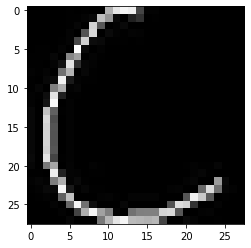

Size (28, 28)
Label 11


In [11]:
test_index = 3
plt.figure(figsize=(4, 4))
plt.imshow(math_symbols_img[test_index], cmap=plt.cm.gray)
plt.show()

print('Size', math_symbols_img[test_index].shape)
print('Label', math_symbols_labels[test_index])

### Normalize Pixels

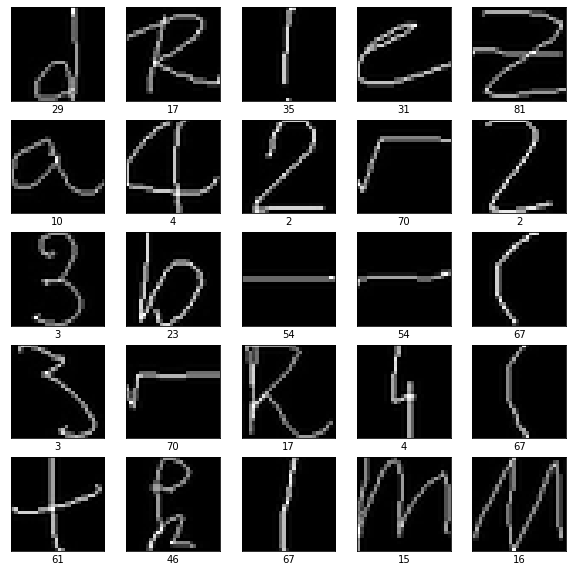

In [12]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_math_symbols[i], cmap=plt.cm.gray)
  plt.xlabel(train_math_labels[i])
plt.show()

In [13]:
image_pixel_size = train_math_symbols.shape[1]
output_classes_size = len(np.unique(math_symbols_labels))
image_pixel_size, output_classes_size

(28, 82)

### Train TensorFlow Neural Network Model

In [14]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_pixel_size, image_pixel_size)),
    keras.layers.Dense(10, activation=tf.nn.relu),

# Optional: You can replace the dense layer above with the convolution layers below to get higher accuracy.
    # keras.layers.Reshape(target_shape=(28, 28, 1)),
    # keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    # keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # keras.layers.Dropout(0.25),
    # keras.layers.Flatten(input_shape=(28, 28)),
    # keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dropout(0.5),

    keras.layers.Dense(output_classes_size, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
import sys
sys.getsizeof(train_math_symbols), sys.getsizeof(train_math_labels)

(1650671360, 2105544)

In [16]:
train_math_labels[0]

29

In [17]:
# Train the digit classification model
model.fit(train_math_symbols, train_math_labels, epochs=5)

Train on 263181 samples
Epoch 1/5
263181/263181 [==============================] - 18s 68us/sample - loss: 1.5146 - accuracy: 0.6321
Epoch 2/5
263181/263181 [==============================] - 18s 67us/sample - loss: 1.0765 - accuracy: 0.7299
Epoch 3/5
263181/263181 [==============================] - 18s 67us/sample - loss: 0.9962 - accuracy: 0.7479
Epoch 4/5
263181/263181 [==============================] - 18s 67us/sample - loss: 0.9567 - accuracy: 0.7563
Epoch 5/5
263181/263181 [==============================] - 18s 67us/sample - loss: 0.9336 - accuracy: 0.7622


### Evaluate Trained Model

In [18]:
test_loss, test_acc = model.evaluate(test_math_symbols, test_math_labels)
print('Test accuracy:', test_acc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Test accuracy: 0.7604993


### Predict Image Class using Trained Model

In [19]:
test_math_predictions = model.predict(test_math_symbols)

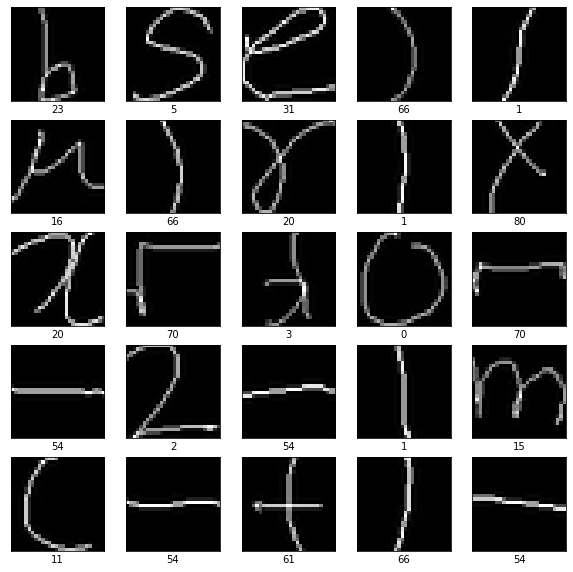

In [20]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_math_symbols[i], cmap=plt.cm.gray)
  plt.xlabel(np.argmax(test_math_predictions[i]))
plt.show()